# <font color=blue> Aufagbestellung:

-- Aufgabe 1: Findet und zählt die roten Smarties in den Bildern.

-- Aufgabe 2: Zählt große und kleine Smarties.

-- Aufgabe 3: Zählt, wie viele Smarties jeweils weggenommen werden (Tipp: Für Veränderungen ist es hilfreich, Bilder zu subtrahieren)

-- Dokumentation von der Lösungen !

## Lösung "Dectection von Smarties"

In [1]:
# Import OpenCV
import cv2
# Since OpenCV is based on numpy:
import numpy as np
# Import pyplot (we will need this to plot with the notebook)
import matplotlib.pyplot as plt
# Helper function to provide plots in true colors in the notebook
import pandas as pd

<font color=red> <b> -- Notwendige Funktionen für die Bildererkennung:

In [2]:
#img_raw = cv2.imread('smarties1.png', cv2.IMREAD_COLOR)
#img = img_raw.copy()

def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

def contrast(image_c):
    #image_c = image.copy()
    alpha = 3.2# Simple contrast control
    beta = -140    # Simple brightness control
    image_c = cv2.convertScaleAbs(image_c, alpha=alpha, beta=beta)
    return image_c

def load_image_and_balance(img_name):
    image = cv2.imread(img_name, cv2.IMREAD_COLOR)
    return contrast(white_balance(image)),white_balance(image),image

def detect_circle(img,minRadius,maxRadius,param1,param2):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
    # Convert to grayscale.
    # Interesting: HSV als BGR annehmen, erzeugt starke Koontraste, die gut erkennbar sind
    gray = cv2.cvtColor(img_hsv , cv2.COLOR_BGR2GRAY) 
    #Blur the image
    gray_blurred = cv2.medianBlur(gray, 5)
    # Apply Hough transform on the blurred image.
    detected_circles = cv2.HoughCircles(gray_blurred,cv2.HOUGH_GRADIENT, 1, 20, 
                                        param1 = param1, param2 = param2, minRadius = minRadius, maxRadius = maxRadius)
    return detected_circles
 
def delete_detected_circles(image,detected_circles):
    
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        # Delete circles by radius + 15.
        cv2.circle(image, (a,b),r+12,(255,255,255),-1)
        
    return image

def show_detected_circles(image,detected_circles,sb):
    if sb==1:
        color=(60, 255, 255)
    if sb==0:
        color=(0, 0, 0)
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        # Draw the circumference of the circle.
        cv2.circle(image, (a, b), r, color , 2)
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(image, (a, b), 1, (0, 0, 255), 3)
    
    print("detected ",len(detected_circles[0]),"Smarties")
    #cv2.imshow("Detected Circle", img)
    #cv2.waitKey(0)
    #plt.figure(figsize = (12,25))
    #plt.imshow(img_norm)
    return image

def color_detection(image,detected_circles,colors):
 
    anzahl = np.zeros(7)
    for middle in detected_circles[0, :]:
        y=int(middle[0]) 
        x=int(middle[1])
        quad=np.zeros(3)
        for i in range(3):
            quad[i]=image[x,y][i]**2
        img_nval = 1/np.sqrt(np.sum(quad))
        rgb_norm=img_nval*image[x,y]
        #print(rgb_norm)
        p=np.sum(np.abs(colors-rgb_norm),axis=1)
        ps=np.round(np.sqrt(np.sum(np.abs(colors-rgb_norm)**2, axis=1)),4)
        anzahl[np.argmin(ps)]+=1
        #print(x,y, d_rot, d_gruen, d_blau, d_dunkelblau, d_himmelblau, d_orange)
    #print(anzahl, "(rot,gruen,blau,dunkelblau,himmelblau,orange,lila)")
    return anzahl
 
def color_detection_hsv(image,image_norm,detected_circles,colors_hsv):
    #image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    anzahl = np.zeros(7)
    for middle in detected_circles[0, :]:
        y=int(middle[0]) 
        x=int(middle[1])
        ph=np.abs(colors_hsv-image[x,y][0])
        anzahl[np.argmin(ph)]+=1
        detected_color=(colors_hsv[np.argmin(ph)],200,200)
        cv2.circle(image_norm, (y, x), 20, detected_color , 6)

    return anzahl,image_norm

def main_color_detect(image_name,colors_hsv):
    img_c,img_norm,img_raw = load_image_and_balance(image_name)
    img_cd = img_c.copy()
    img_color_detect=img_norm.copy()
    img_norm=cv2.cvtColor(img_norm, cv2.COLOR_BGR2HSV)
    img_hsv=cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
    #plt.imshow(img_c)
    print('detect big smarties:')
    detected_circles_big=detect_circle(img_c,50,57,70,23)
    #detected_circles_big=detect_circle(img_c,50,57,75,24)
    if detected_circles_big is not None:
        img_cd=delete_detected_circles(img_cd,detected_circles_big)  
        img_norm=show_detected_circles(img_norm,detected_circles_big,1)
        number_big_color, img_norm = color_detection_hsv(img_hsv,img_norm,detected_circles_big,colors_hsv)
        #number_big_color=color_detection(img_color_detect, detected_circles_big, colors)
    print('detect small smarties:')
    detected_circles_small=detect_circle(img_cd,32,38,80,14)
    if detected_circles_small is not None:
        img_cd=delete_detected_circles(img_cd,detected_circles_small)
        img_norm=show_detected_circles(img_norm,detected_circles_small,0)
        number_small_color,img_norm=color_detection_hsv(img_hsv,img_norm,detected_circles_small,colors_hsv)
        #number_small_color=color_detection(img_color_detect, detected_circles_small, colors)
        
    #detected_circles_edge=detect_circle(img_cd,8,15,20,10)
    #if detected_circles_edge is not None:
    #    img_norm=show_detected_circles(img_norm,detected_circles_edge,0)
    plt.figure(figsize = (12,25))
    #plt.imshow(img_norm)
    plt.imshow(cv2.cvtColor(img_norm , cv2.COLOR_HSV2RGB))
    return number_big_color, number_small_color


<font color=red> <b> -- Klassierung der einzelnen Farben. </font> <p>
    --> Hier wird im RGB Farbraum die Farberkennung druchgeführt.

In [3]:
colors = [[116.0, 51.0, 55.0],[53.0, 123.0, 84.0],[1.0, 96.0, 189.0],[10.0, 28.0, 133.0],[1.0, 157.0, 183.0],[161.0, 110.0, 16.0],[105.0, 62.0, 181.0]]
colors=np.array(colors)
colors_norm = 1/np.sqrt(np.sum(colors**2,axis=1))
for i in range(7):
    colors[i,0]=colors_norm[i]*colors[i,0]
    colors[i,1]=colors_norm[i]*colors[i,1]
    colors[i,2]=colors_norm[i]*colors[i,2]

colors_hsv = [0,20,30,45,100,120,150]

<font color=red> <b> -- Die Farberkennung wird nun durchgeführt:


 detection runs on image: smarties0.png
detect big smarties:
detected  24 Smarties
detect small smarties:
detected  66 Smarties

 detection runs on image: smarties1.png
detect big smarties:
detected  24 Smarties
detect small smarties:
detected  63 Smarties

 detection runs on image: smarties2.png
detect big smarties:
detected  22 Smarties
detect small smarties:
detected  58 Smarties

 detection runs on image: smarties3.png
detect big smarties:
detected  20 Smarties
detect small smarties:
detected  56 Smarties

 detection runs on image: smarties4.png
detect big smarties:
detected  20 Smarties
detect small smarties:
detected  47 Smarties

 detection runs on image: smarties5.png
detect big smarties:
detected  20 Smarties
detect small smarties:
detected  43 Smarties

 detection runs on image: smarties6.png
detect big smarties:
detected  18 Smarties
detect small smarties:
detected  40 Smarties

 detection runs on image: smarties7.png
detect big smarties:
detected  17 Smarties
detect small 

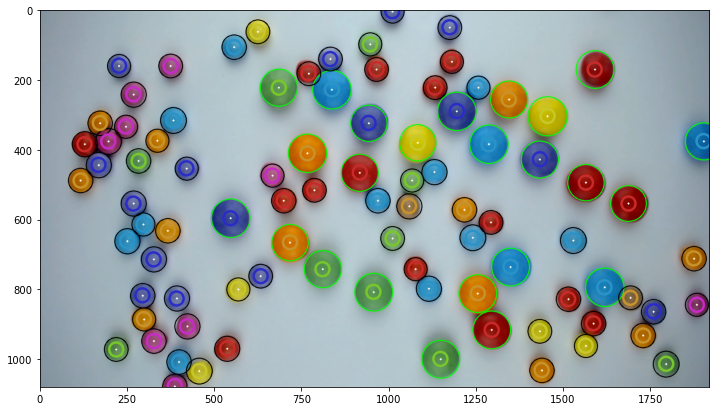

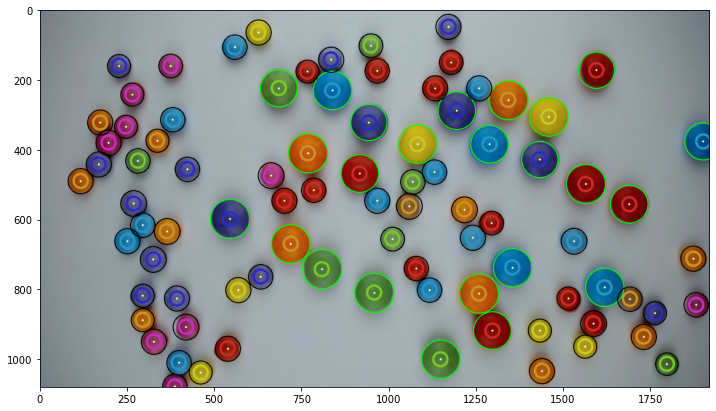

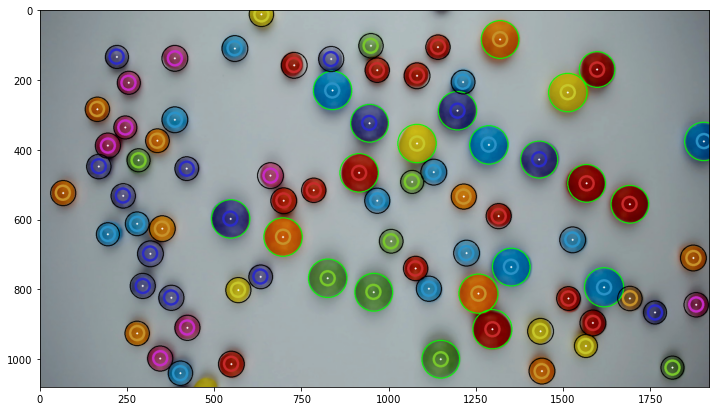

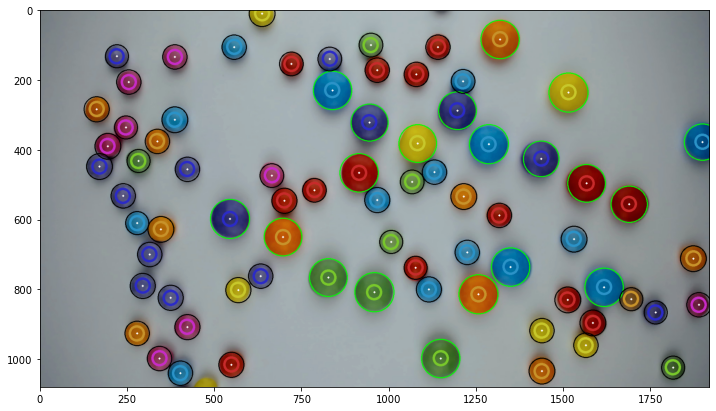

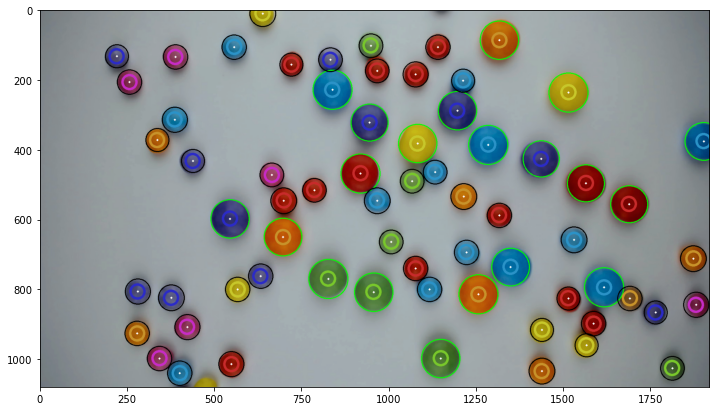

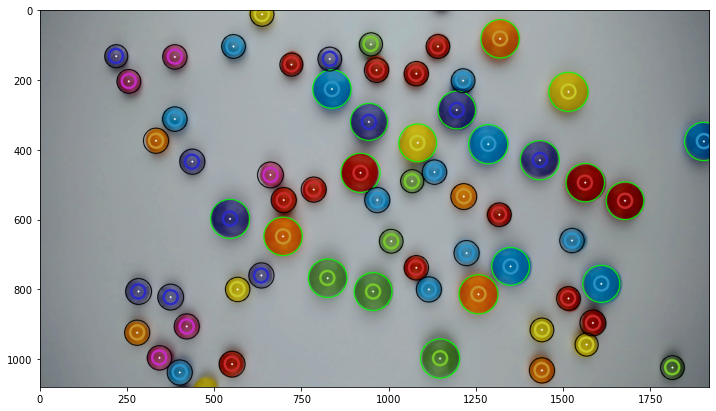

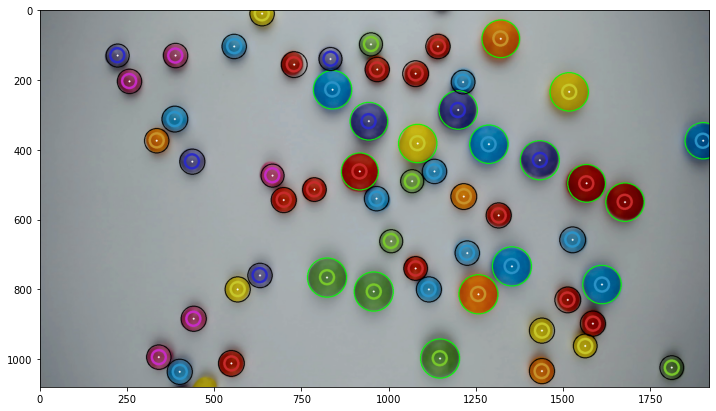

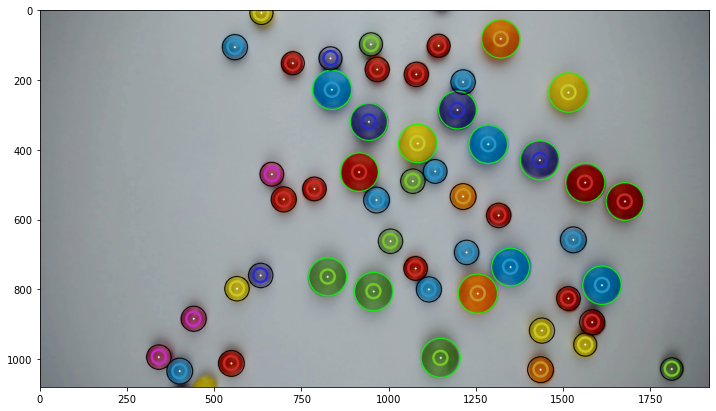

In [4]:
numberofimage=8
numberofcolors=7
smarties_counter_big = np.zeros((numberofimage,numberofcolors))
smarties_counter_small = np.zeros((numberofimage,numberofcolors))
image_name=['']*numberofimage
for i in range(numberofimage):
    image_name[i]='smarties'+str(i)+'.png'

for i in range(numberofimage):
    print("\n",'detection runs on image:',image_name[i])
    smarties_counter_big[i], smarties_counter_small[i] = main_color_detect(image_name[i],colors_hsv)

df_big = pd.DataFrame(smarties_counter_big, columns = ['rot','orange','gelb','gruen','hellblau','blau','rosa'])
df_big.insert(loc=0, column='Summe', value=df_big.sum(axis=1))
df_big.style.set_caption("Big Smarties")
df_small = pd.DataFrame(smarties_counter_small, columns = ['rot','orange','gelb','gruen','hellblau','blau','rosa']) 
df_small.insert(loc=0, column='Summe', value=df_small.sum(axis=1))
print('\n Big Smarites: \n',df_big,'\n \n Small Smarites: \n',df_small,'\n \n All Smarties: \n',df_small+df_big)

#(rot,gruen,blau,dunkelblau,himmelblau,orange,lila)
#print('\n',smarties_counter_big,'\n',smarties_counter_small)

## <font color=blue> Fazit

Zur Kreiserkennung wird HoughCircles Methode benutz !

<b>Lösung: </b>
Am Anfang waren 90 Smarties erkannt und am Ende waren nur noch 51 übrig geblieben.
Von 90 Smarties waren 66 kleine und 24 große und bei 51 Smarties 34 kleine und 17 große.

<b>Folgende Probleme gibt es noch bei der Bildererkennung: </b> <p>
    -Erkennung des Brauntons (der Ton ist sehr nah zu rot und schwarz) <p>
    -Kreise deren Mittelpunkt außerhalb das Bild liegen
        
Um die Lösungen zu verdeutlichen werden für große Smarties grüne Kreise und für kleine Smarties schwarze Kreise gezeichnet. Daraufhin werden die Farben der detektierten Kreismittelpunkte im HSV Farbraum ermittelt. Die ermittelten Farben werden mit den Sollfarbtönen verglichen und somit zugeordnet. Zur Veranschaulichung der Ergebnisse sind Farbkreise der ermittelten Farbe in die Smarties eingefügt. <br>
Die Lösung der Aufgabe wird in drei Tabellen dargestellt, wobei alle Smarties in ihren Häufigkeiten dargestellt sind.
Alle Bilder mit ihren erkannten Kreisen werden zudem geplottet.

#### <font color=blue> Anmerkung: Ich und ein andere Kollege habe ich zusammen gearbeitet !